In [1]:
import sys
import seaborn as sns
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr, spearmanr
import scipy.stats as stats
from scipy.stats import gaussian_kde
import pandas as pd

In [58]:
method = "eclip"
#method = "clearclip"

RBP_name =  sys.argv[1]
k = 6 #k-mer length
Lgths = [10, 20, 50, 100, 200]  #peak length
RBP_list = ["EWSR1", "HNRNPC", "HNRNPK", "HNRNPL", "TARDBP", "PCBP1"]
#RBP_list = ["HNRNPA0", "RBM4","LIN28b", "RBM41", "ZRANB2"]
#RBP_list = ["HNRNPA0", "RBM4", "RBM41", "ZRANB2"]
conc = 1300
RBP_row_P = {}
RBP_row_S = {}

In [59]:
for RBP_name in RBP_list:
    print (RBP_name)
    P_corr_vals= []
    S_corr_vals = []
    
    #Extract BindnSeq enrichment scores 
    bind_enrich = {}
    kmer_list = []
    bind_file = open (f"data/{RBP_name}/Bindnseq_{k}mers.tsv","r")
    header = next (bind_file)
    for line in bind_file:
        bind_clms = line.split()
        kmer = bind_clms[0]
        kmer_list.append (kmer)
        if (RBP_name == "LIN28b" or RBP_name == "ZRANB2"):
            enrich_score = bind_clms[3]
        else:    
            enrich_score = bind_clms[5]
        #enrich_score = bind_clms[conc]#concentration 1= 5, 2 = 20, 3= 80,4 = 320, 5 = 3200
        bind_enrich[kmer] = float(enrich_score)
        
    #Extract clearCLIP/eCLIP enrichment score
    method_enrichment_score = {} #with respect to flanking background
    #L = 50
    for L in Lgths:
        method_enrichment_file = open(f"data/{RBP_name}/{method}_{L}_peak_{k}-mer_enrichment.csv", "r")
        header = next(method_enrichment_file)
        for enric_line in method_enrichment_file:
            enric_clmns = enric_line.split()
            kmer = enric_clmns[0]
            enrich_score_back = enric_clmns[1]
            method_enrichment_score[kmer] = float(enrich_score_back)
        
        #Calculate correlation values
        Meth_List =[]
        BIND_list=[]
        for kmer in kmer_list:
            try:
                Meth_List.append(method_enrichment_score[kmer])
                BIND_list.append(bind_enrich[kmer])
            except:
                continue
        X = Meth_List
        Y = BIND_list
        p_corr = stats.pearsonr(X, Y)[0]
        S_corr = stats.spearmanr(X, Y)[0]
        P_corr_vals.append(p_corr)
        S_corr_vals.append(S_corr)
    RBP_row_P [RBP_name]= P_corr_vals
    RBP_row_S [RBP_name]= S_corr_vals

EWSR1
HNRNPC
HNRNPK
HNRNPL
TARDBP
PCBP1


In [60]:
#Define dataframe
p_df =pd.DataFrame (columns = ["10","20","50","100","200"])
p_df


,10,20,50,100,200


In [61]:
for RBP_name in RBP_list:
    p_df.loc[RBP_name]= RBP_row_P[RBP_name]
p_df

,10,20,50,100,200
EWSR1,0.019083,0.045042,-0.010315,-0.038419,-0.003359
HNRNPC,-0.137119,-0.010414,0.014263,-0.000452,0.000466
HNRNPK,0.031972,-0.010417,-0.025762,0.025418,0.038374
HNRNPL,0.013730,-0.040809,0.008606,-0.010567,0.016450
TARDBP,0.031618,0.041546,0.022131,-0.038917,0.026521
PCBP1,-0.009539,0.005366,-0.014247,-0.023288,-0.003869


In [62]:
s_df =pd.DataFrame (columns = ["10","20","50","100","200"])
for RBP_name in RBP_list:
    s_df.loc[RBP_name]= RBP_row_S[RBP_name]
s_df

,10,20,50,100,200
EWSR1,0.020326,0.033911,-0.021878,-0.036026,-0.008815
HNRNPC,-0.031512,-0.007820,0.036593,-0.001317,-0.025581
HNRNPK,0.024627,-0.031698,-0.037554,0.013246,0.033822
HNRNPL,-0.001041,-0.058802,-0.000330,-0.019315,0.016441
TARDBP,0.015815,0.066421,0.033394,-0.046949,0.026175
PCBP1,-0.028327,-0.023799,-0.029829,-0.019687,-0.011001


In [63]:
def getCustomSymbol1(path_index=1):
  if path_index==1:  #upper triangle
      verts = [
      (0.0,0.0),
      (1.0,0.0),
      (1.0,1.0),
      (0.0,0.0),]
  else:              #lower triangle
      verts = [
      (0.0,0.0),
      (0.0,1.0),
      (1.0,1.0),
      (0.0,0.0),]
  codes = [matplotlib.path.Path.MOVETO,
           matplotlib.path.Path.LINETO,
           matplotlib.path.Path.LINETO,
           matplotlib.path.Path.CLOSEPOLY,
           ] 
  pathCS1 = matplotlib.path.Path(verts, codes)
  return pathCS1, verts

def plot_mat1(matrix=np.random.rand(40,40), path_index=1, alpha=1, vmin=0., vmax=1.):
    nx,ny = matrix.shape
    X,Y,values = zip(*[ (i,j,matrix[i,j]) for i in range(nx) for j in range(ny) ] )
    marker,verts = getCustomSymbol1(path_index=path_index)
    ax.scatter(X,Y,s=4000, 
               marker=marker, 
               c=values, 
               #cmap='plasma', 
               alpha=alpha, 
               vmin=vmin, vmax=vmax )
    return
def plot_mat(matrix=np.random.rand(20,20), path_index=1, alpha=1, vmin=0., vmax=1.):
    nx,ny = matrix.shape
    X,Y,values = zip(*[ (i,j,matrix[i,j]) for i in range(nx) for j in range(ny) ] )
    marker,verts = getCustomSymbol1(path_index=path_index)
    #ax = plt.axes()
    #sns.heatmap(df1, annot=True, ax = ax)
    #ax.set_title(f'{method}')
    ax.xaxis.tick_top()
    #ax.set_xticklabels(Lgths)
    #ax.set_yticklabels (RBP_list)
    ax.scatter(X,Y,s=4000, 
               marker=marker, 
               c=values, 
               cmap='plasma', 
               alpha=alpha, 
               vmin=vmin, vmax=vmax)
    return

K 6


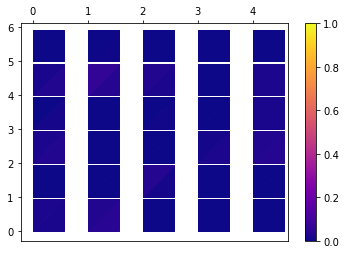

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)
A  = p_df.to_numpy()
B  = s_df.to_numpy()
vmin = 0
vmax = 1
print ("K",k)
plot_mat(path_index=1,vmin=vmin,vmax=vmax,matrix=A.transpose())
plot_mat(path_index=2,vmin=vmin,vmax=vmax,matrix=B.transpose())
#plt.xlim([0,6])
#plt.ylim([0,5])
# for the colorbar i did the trick to make first a fake mappable:
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax ) )
sm._A=[]
#plt.xaxis.tick_top()
#plt.set_x
plt.colorbar(sm)
plt.show()
plt.save("eclip_6.pdf")
